
Aim: Prepare the Correlated dataset of your own example or Download the any 
one of the UCI ML data Set in which find the correlated data and Find the best 
fit line for the data


[Bike Sharing Dataset]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:

df = pd.read_csv("day.csv")
print(df.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [6]:

df_numeric = df.select_dtypes(include=['number'])

# Compute correlation
correlation_matrix = df_numeric.corr()
print(correlation_matrix["cnt"].sort_values(ascending=False))



cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


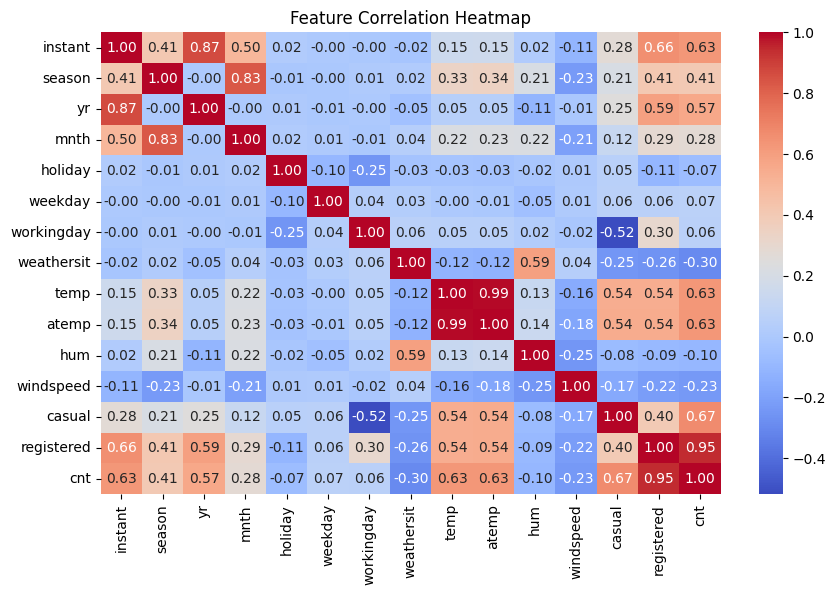

In [7]:
# Visualize correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:

X = df[['temp']]
y = df['cnt']

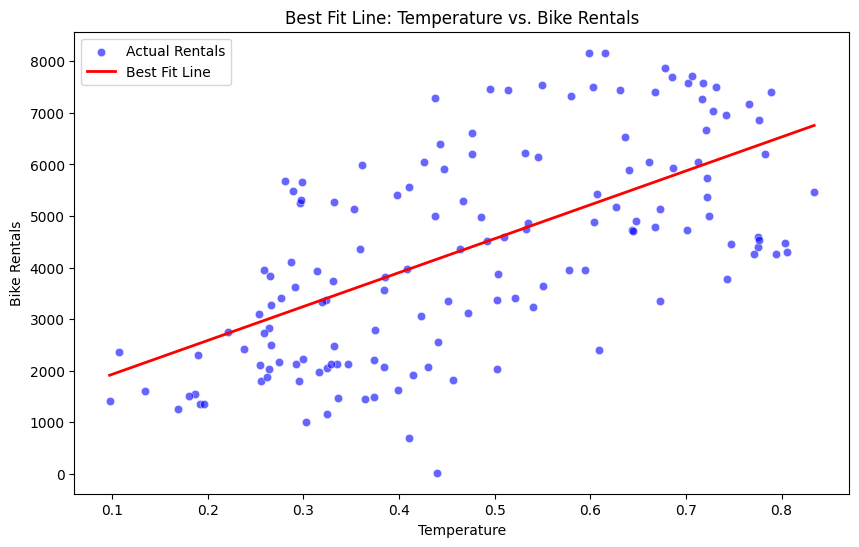

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot Best Fit Line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['temp'], y=y_test, color="blue", alpha=0.6, label="Actual Rentals")
sns.lineplot(x=X_test['temp'], y=y_pred, color="red", linewidth=2, label="Best Fit Line")
plt.xlabel("Temperature")
plt.ylabel("Bike Rentals")
plt.title("Best Fit Line: Temperature vs. Bike Rentals")
plt.legend()
plt.show()